# Problem Statement

The rapid growth of bike-sharing systems has generated large volumes of data related to environmental conditions, time-based factors, and user behavior. Accurately predicting bike rental demand is crucial for optimizing resource allocation, improving customer satisfaction, and reducing operational costs.

However, bike demand is influenced by multiple factors such as:

- Weather conditions (temperature, humidity, windspeed)

-  Seasonal and temporal patterns (season, month, weekday, working day)

- External conditions (holiday, weather situation)

The challenge is to build a robust regression-based machine learning system that can effectively learn these patterns and accurately predict the total number of bike rentals (cnt).

# Objective

The objective of this project is to:

- Preprocess and analyze the bike-sharing dataset

- Train and compare multiple regression models:

   - Linear Regression

   - Random Forest Regressor

   - Gradient Boosting Regressor

   - K-Nearest Neighbors Regressor

   - Support Vector Regressor (SVR)

   - LightGBM Regressor (LGBM)

- Evaluate models using:

   - R² Score

   - Adjusted R²

   - MAE

   - MSE

   - RMSE

   - Accuracy-like metric (R² × 100)

- Track experiments, metrics, and models using MLflow

- Register and load the best-performing models

- Build an interactive Streamlit application for prediction and visualization

## Import Libraries 

In [241]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

## Read the Dataset

In [242]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\bike sharing project\day.csv')

### .head() --> gives the default 5 records of the dataset

In [243]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis

### .info() --> gives the total information of the dataset 

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### .isnull().sum() --> checks whether null values present in the dataset

In [245]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### ** This dataset does not contain any null values **

### check how many columns we have in the dataset

In [246]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### shape of the dataset

In [247]:
data.shape

(731, 16)

#### In this dataset there are **731 records** and **16 features**

## Descriptive Statists

In [248]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### mean of the cnt feature

In [249]:
cnt_mean=data['cnt'].mean()
print(cnt_mean)

4504.3488372093025


### Count of the cnt feature

In [250]:
cnt_count=data['cnt'].count()
print(cnt_count)

731


### maximum values of cnt feature

In [251]:
cnt_max = data['cnt'].max()
print(cnt_max)

8714


### minimum values of cnt feature 

In [252]:
cnt_min = data['cnt'].min()
print(cnt_min)

22


### Detect missing values 

In [253]:
data.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [254]:
data.isnull().any().any()

np.False_

# Univarient Analysis

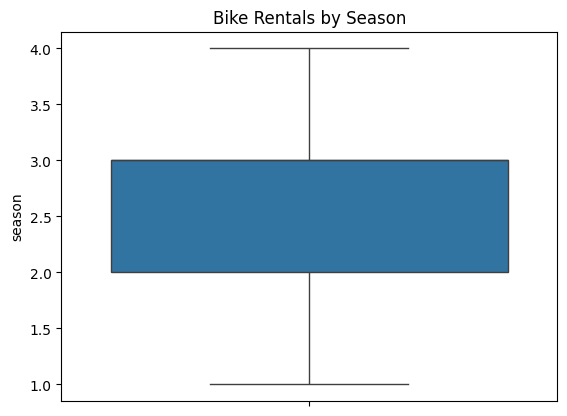

In [255]:
sns.boxplot(data=data, y='season')
plt.title("Bike Rentals by Season")
plt.show()

# Bivarient analysis

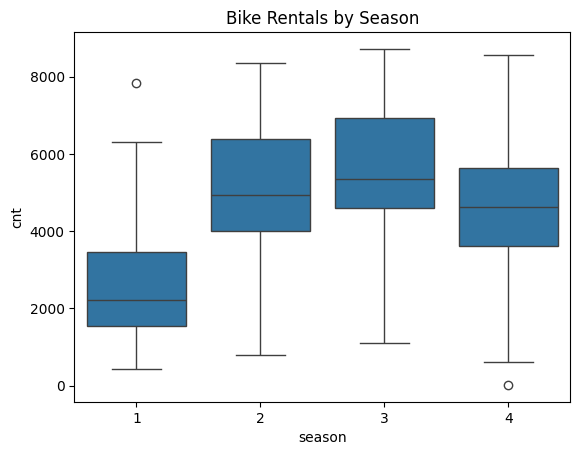

In [256]:
sns.boxplot(data=data, x='season', y='cnt')
plt.title("Bike Rentals by Season")
plt.show()

#### **1:winter, 2:spring, 3:summer, 4:fall**
- **WINTER** --Low bike rentals 
- **Spring** --mid to high range
- **Summer** -- higest bike rentals
- **Fall** --lower than summer 


## lmplot for season vs cnt feature 

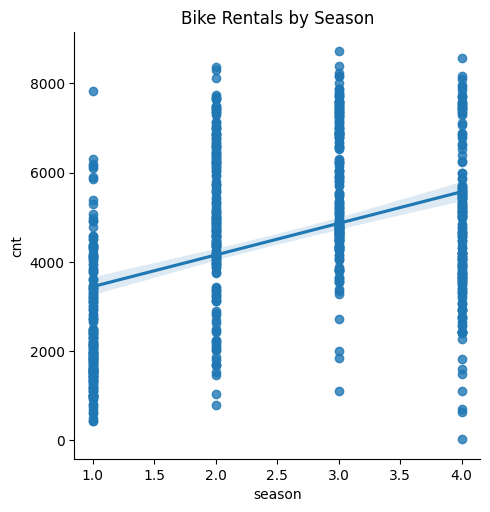

In [257]:
sns.lmplot(data=data, x='season', y='cnt')
plt.title("Bike Rentals by Season")
plt.show()

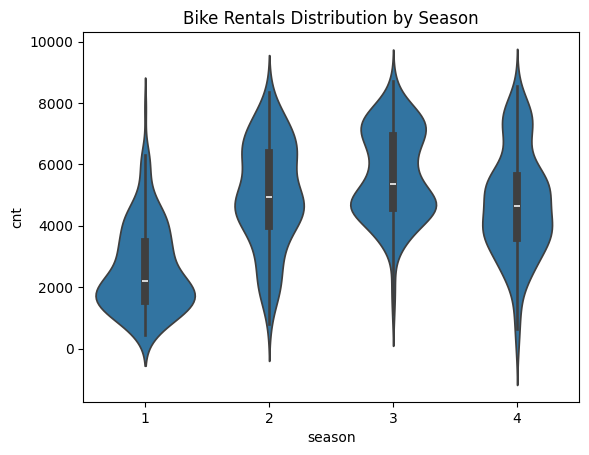

In [258]:
sns.violinplot(data=data, x='season', y='cnt')
plt.title("Bike Rentals Distribution by Season")
plt.show()

- The regression line slopes upward

- This indicates a  positive correlation relationship between season code and bike rentals

we move from Winter → Spring → Summer → Fall,

#### **Bike rentals show a strong seasonal pattern.**

## temp vs cnt features 

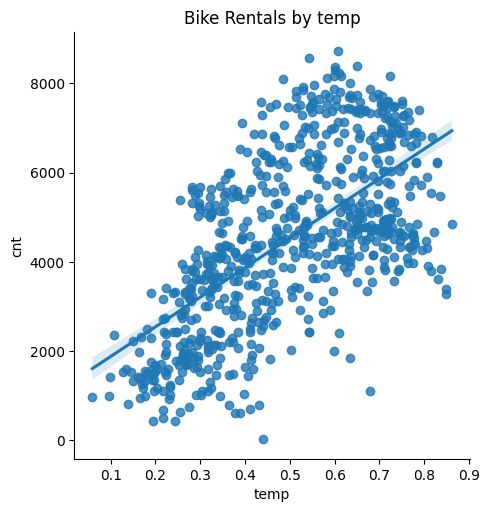

In [259]:
sns.lmplot(data=data, x='temp', y='cnt')
plt.title("Bike Rentals by temp")
plt.show()

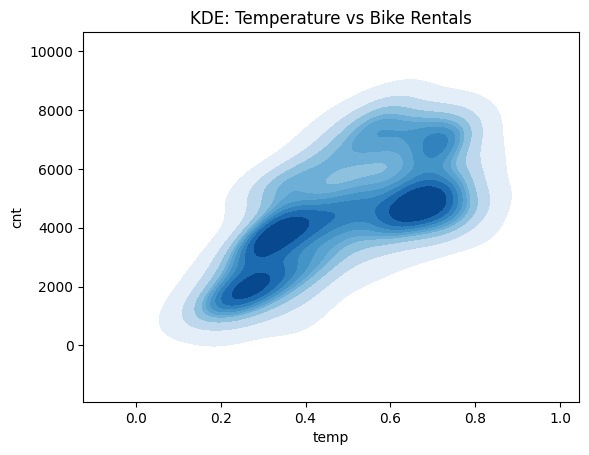

In [260]:
sns.kdeplot(data=data, x='temp', y='cnt', fill=True, cmap='Blues')
plt.title("KDE: Temperature vs Bike Rentals")
plt.show()


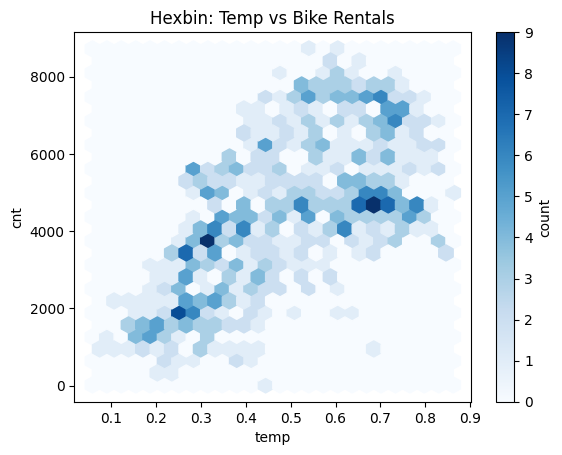

In [261]:
plt.hexbin(data['temp'], data['cnt'], gridsize=25, cmap='Blues')
plt.colorbar(label='count')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.title("Hexbin: Temp vs Bike Rentals")
plt.show()

### **As temperature increases, the number of bike rentals rises significantly, indicating a strong positive linear relationship.**

## weathersit vs cnt features

- **1 → Clear / Few clouds**
- **2 → Mist / Cloudy**
- **3 → Light rain / Snow**


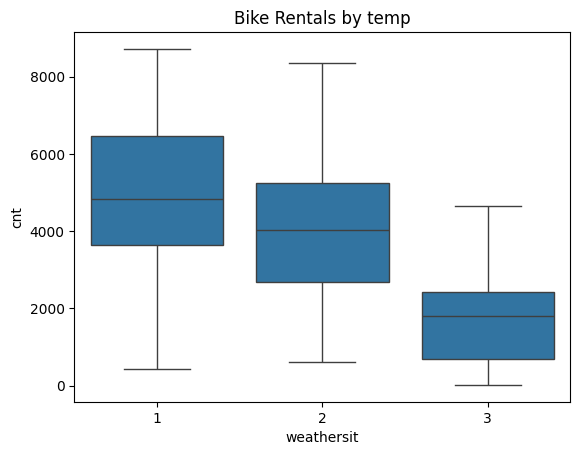

In [262]:
sns.boxplot(data=data, x='weathersit', y='cnt')
plt.title("Bike Rentals by temp")
plt.show()

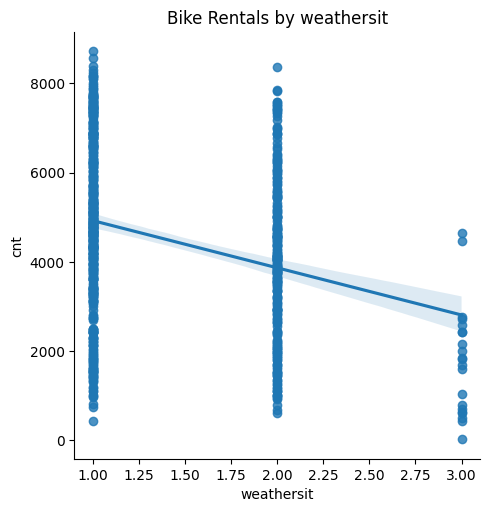

In [263]:
sns.lmplot(data=data, x='weathersit', y='cnt')
plt.title("Bike Rentals by weathersit")
plt.show()

### **From both graphs we observe that weather conditions have a significant negative impact on bike rental demand. Clear weather shows the highest rentals, while rainy or snowy conditions result in the lowest usage.**

## hum vs cnt features

#### **Normalized humidity. The values are divided to 100 (max)**

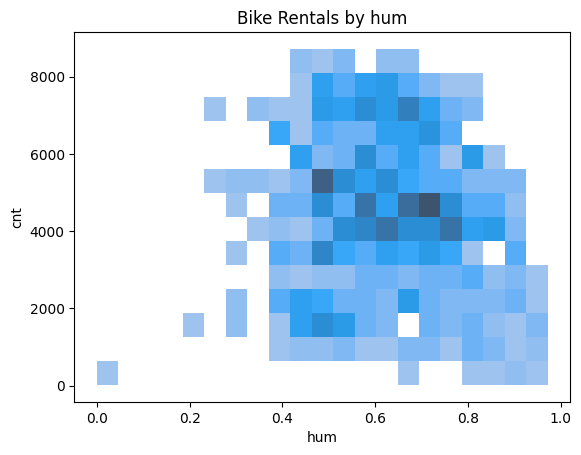

In [264]:
sns.histplot(data=data, x='hum', y='cnt')
plt.title("Bike Rentals by hum")
plt.show()

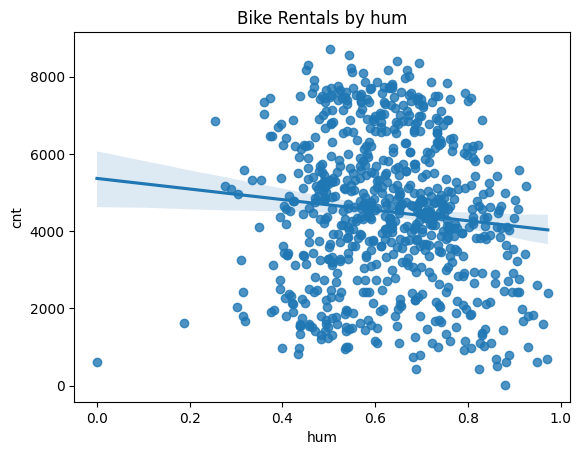

In [265]:
sns.regplot(data=data, x='hum', y='cnt')
plt.title("Bike Rentals by hum")
plt.show()

### **The density plot indicates that bike rentals peak at moderate humidity levels, while extremely high humidity discourages bike usage.**

## yr vs cnt

- year 
- **0: 2011**
- **1: 2012**

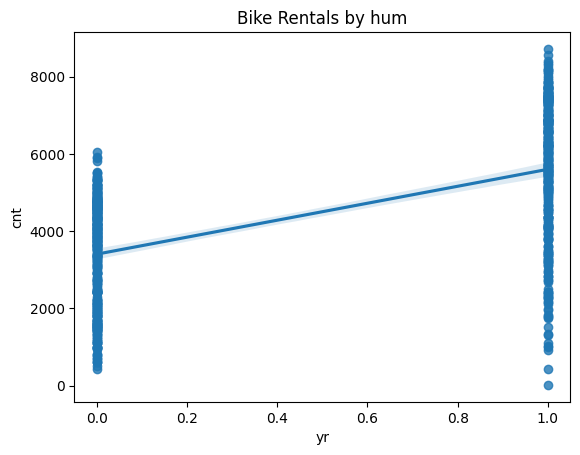

In [266]:
sns.regplot(data=data, x='yr', y='cnt')
plt.title("Bike Rentals by hum")
plt.show()

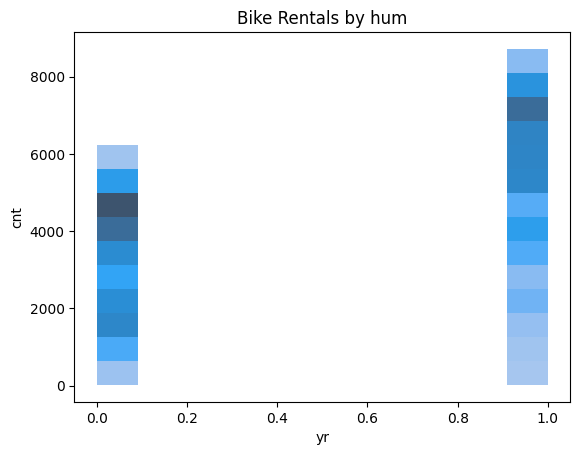

In [267]:
sns.histplot(data=data, x='yr', y='cnt')
plt.title("Bike Rentals by hum")
plt.show()

## Observations

- 2012 (yr = 1) shows:

  - Higher upper range

  - More high-rental days

- 2011 (yr = 0):

  - Mostly lower rental counts

## Prediction:
- Bike rental usage increased significantly in 2012 compared to 2011.

## windspeed vs cnt

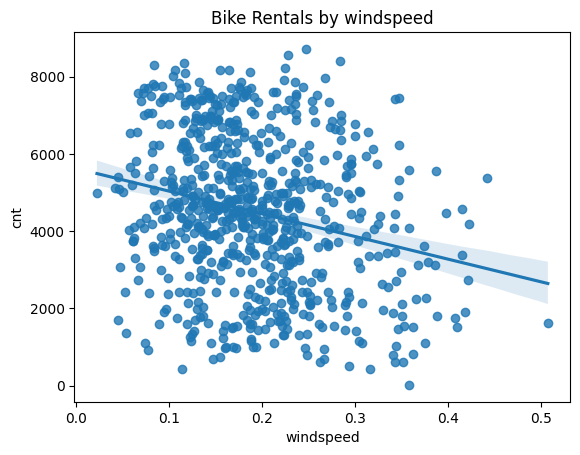

In [268]:
sns.regplot(data=data, x='windspeed', y='cnt')
plt.title("Bike Rentals by windspeed")
plt.show()

#### **Wind speed shows a negative relationship with bike rental demand. Higher wind speeds reduce user comfort, leading to lower bike usage, although the effect is weaker compared to temperature.**

## holiday vs cnt

- **0 → Not a holiday**
- **1 → Holiday**

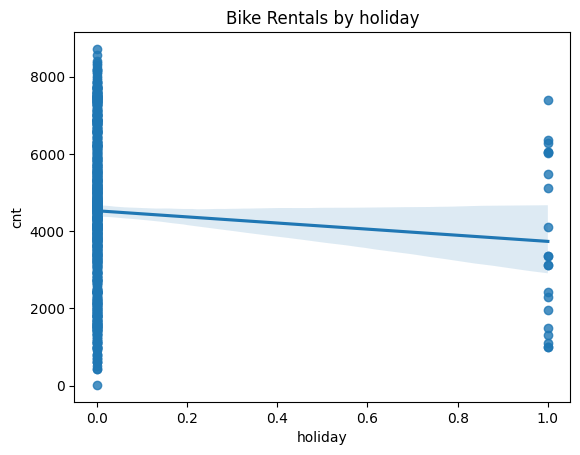

In [269]:
sns.regplot(data=data, x='holiday', y='cnt')
plt.title("Bike Rentals by holiday")
plt.show()

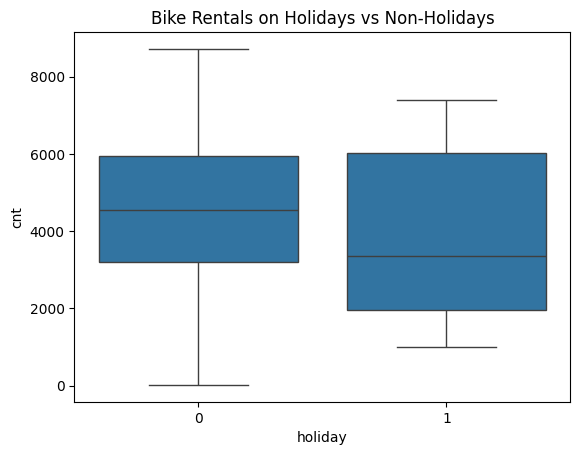

In [270]:
sns.boxplot(data=data, x='holiday', y='cnt')
plt.title("Bike Rentals on Holidays vs Non-Holidays")
plt.show()


Key Observations 

- Non-Holiday Days (holiday = 0)

Majority of data points

Very wide range of rentals


- Holiday Days (holiday = 1)

Very few observations

Rentals mostly lower to moderate

Rarely reach peak values

- Prediction:
Bike rentals are generally lower on holidays.

## workingday vs cnt

workingday

- 0 → weekend / holiday

- 1 → working day

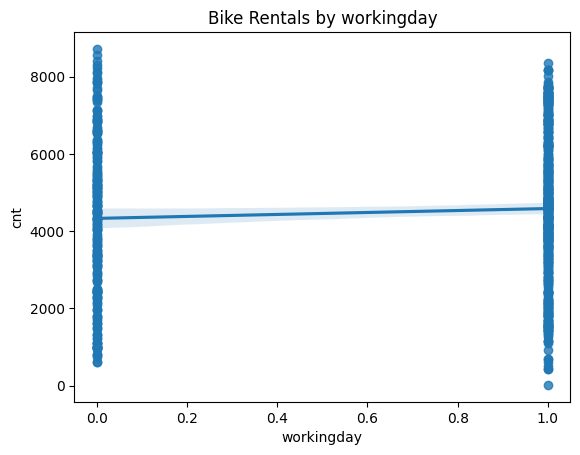

In [271]:
sns.regplot(data=data, x='workingday', y='cnt')
plt.title("Bike Rentals by workingday")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17276\1336704579.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='workingday', y='cnt', ci=None)


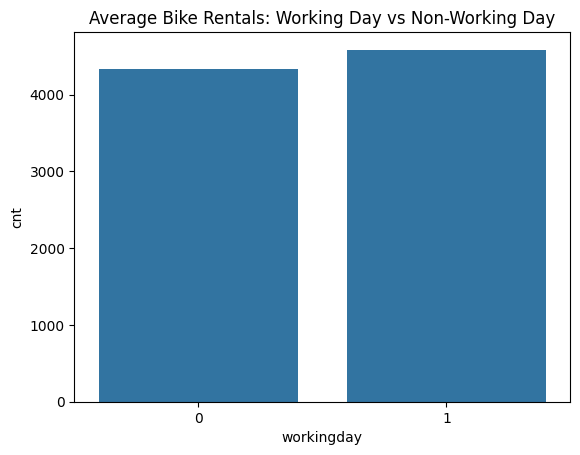

In [272]:
sns.barplot(data=data, x='workingday', y='cnt', ci=None)
plt.title("Average Bike Rentals: Working Day vs Non-Working Day")
plt.show()


## weekday vs cnt

weekday

- 0 = Sunday

- 1 = Monday

- 2 = Tuesday

- 3 = Wednesday

- 4 = Thursday

- 5 = Friday

- 6 = Saturday

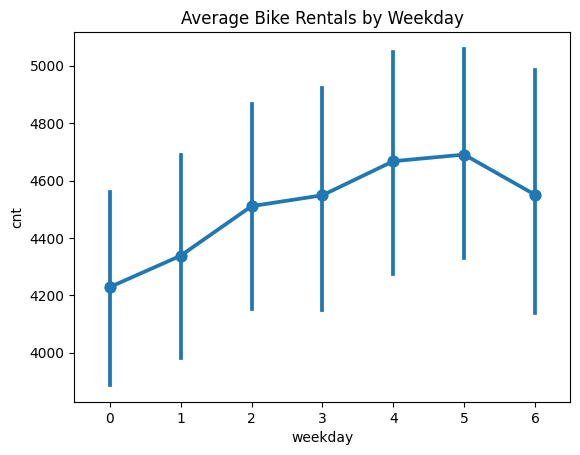

In [273]:
sns.pointplot(data=data, x='weekday', y='cnt')
plt.title("Average Bike Rentals by Weekday")
plt.show()

## scatterplot for Register Users and also casual users

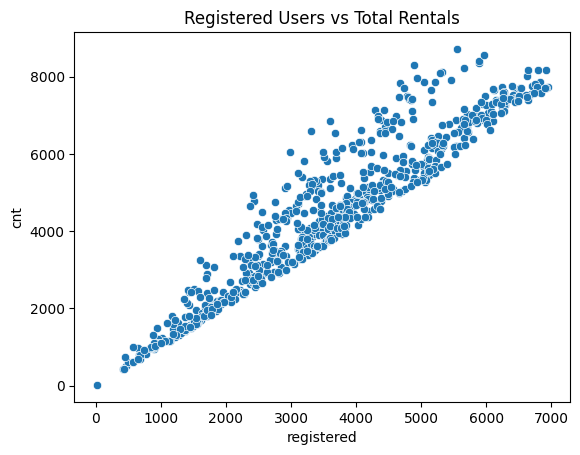

In [274]:
sns.scatterplot(data=data, x='registered', y='cnt')
plt.title("Registered Users vs Total Rentals")
plt.show()

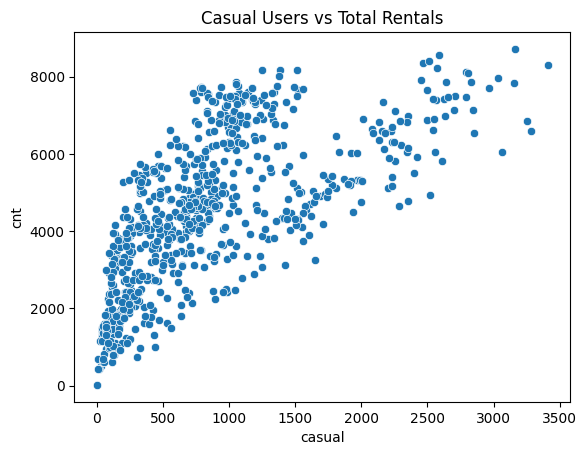

In [275]:
sns.scatterplot(data=data, x='casual', y='cnt')
plt.title("Casual Users vs Total Rentals")
plt.show()

## dteday vs cnt 

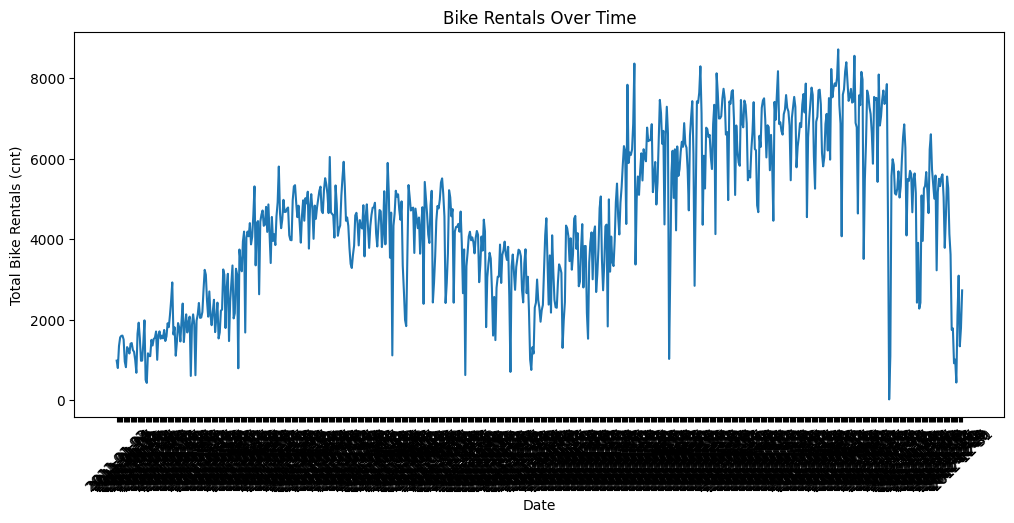

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(data['dteday'], data['cnt'])
plt.xlabel("Date")
plt.ylabel("Total Bike Rentals (cnt)")
plt.title("Bike Rentals Over Time")
plt.xticks(rotation=45)
plt.show()


### **Sudden drops and spikes,Noise is captured better by other variables.**


## atemp vs cnt

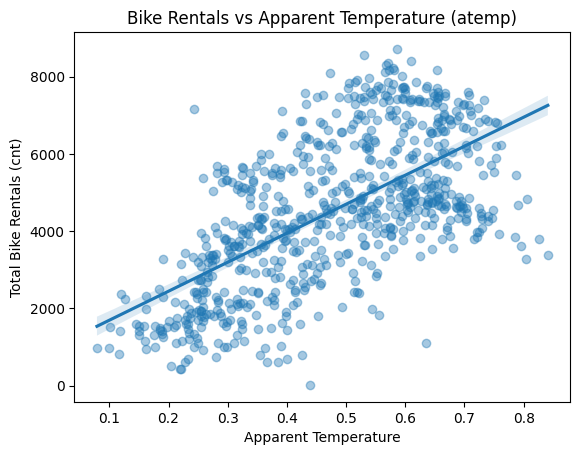

In [277]:
sns.regplot(
    data=data,
    x='atemp',
    y='cnt',
    scatter_kws={'alpha': 0.4}
)
plt.title("Bike Rentals vs Apparent Temperature (atemp)")
plt.xlabel("Apparent Temperature")
plt.ylabel("Total Bike Rentals (cnt)")
plt.show()


#### As apparent temperature increases, rentals increase

# Multi Varient Analysis

## Monthly Bike Renteals By Season

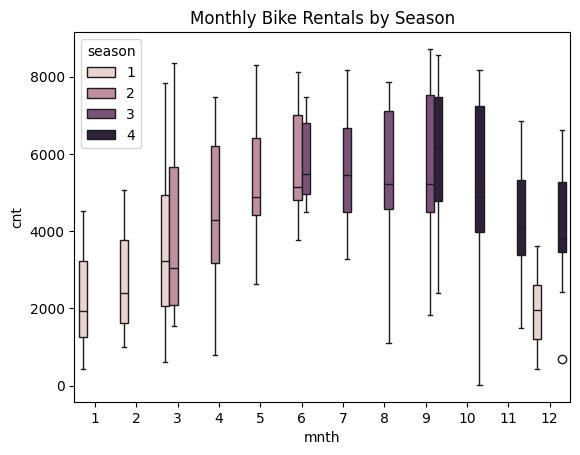

In [278]:
sns.boxplot(data=data, x='mnth', y='cnt', hue='season')
plt.title("Monthly Bike Rentals by Season")
plt.show()

1️- Highest bike demand

Fall months (Season = 3) → Aug, Sep, Oct

Median rentals often > 6000–7000

2️- Lowest bike demand

Winter months (Season = 4) → Jan, Feb, Dec

Low medians (~1500–3000)

## Temp vs Rentals Split by Season

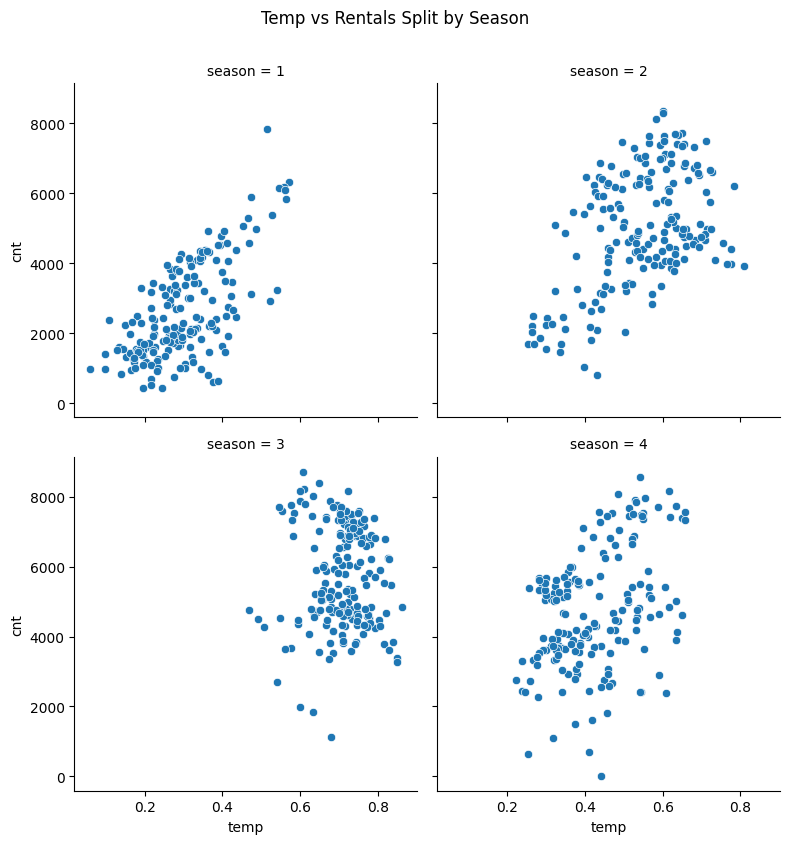

In [279]:
g = sns.FacetGrid(data, col='season', col_wrap=2, height=4)
g.map(sns.scatterplot, 'temp', 'cnt')
g.fig.suptitle("Temp vs Rentals Split by Season", y=1.05)
plt.show()


## PairPlot for cnt,temp,hum,windspeed,season

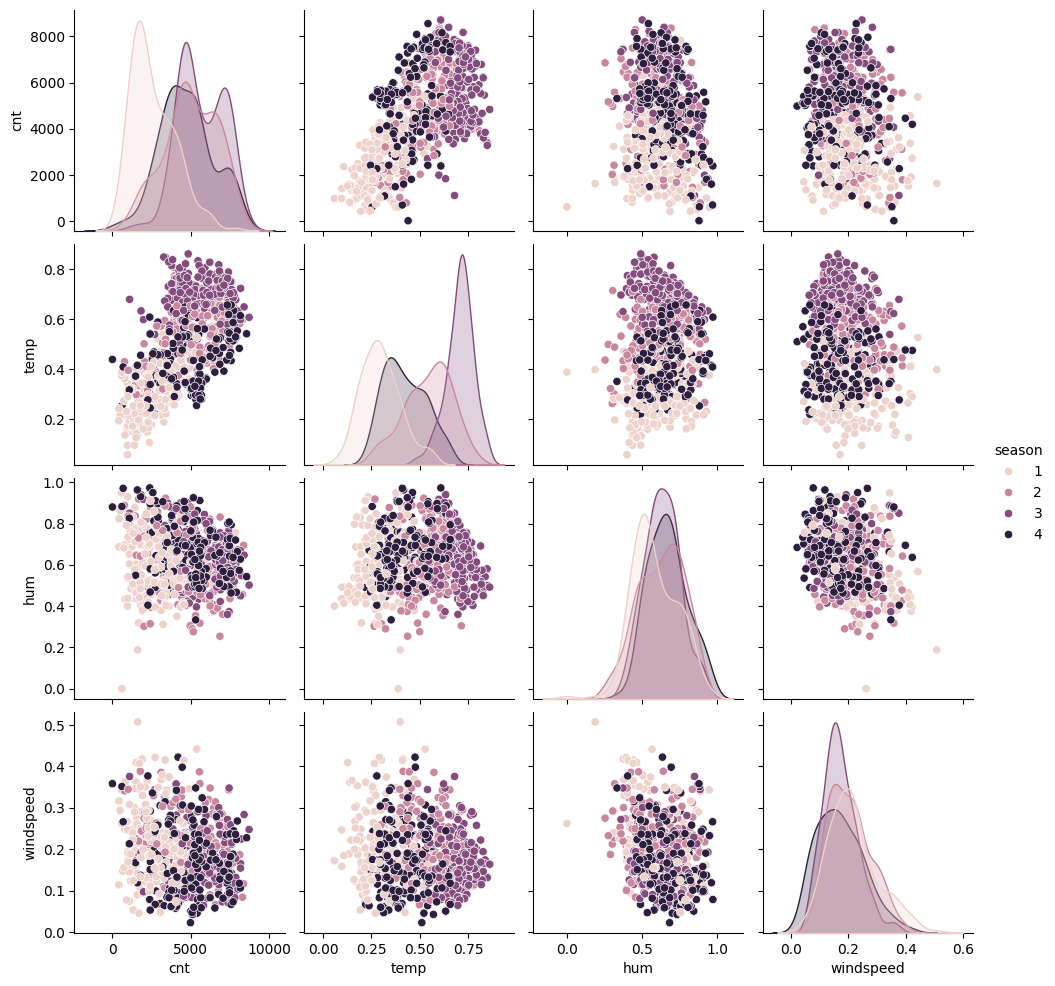

In [280]:
sns.pairplot(
    data[['cnt','temp','hum','windspeed','season']],
    hue='season'
)
plt.show()


## season, yr, mnth, weathersit, temp, hum, windspeed vs cnt

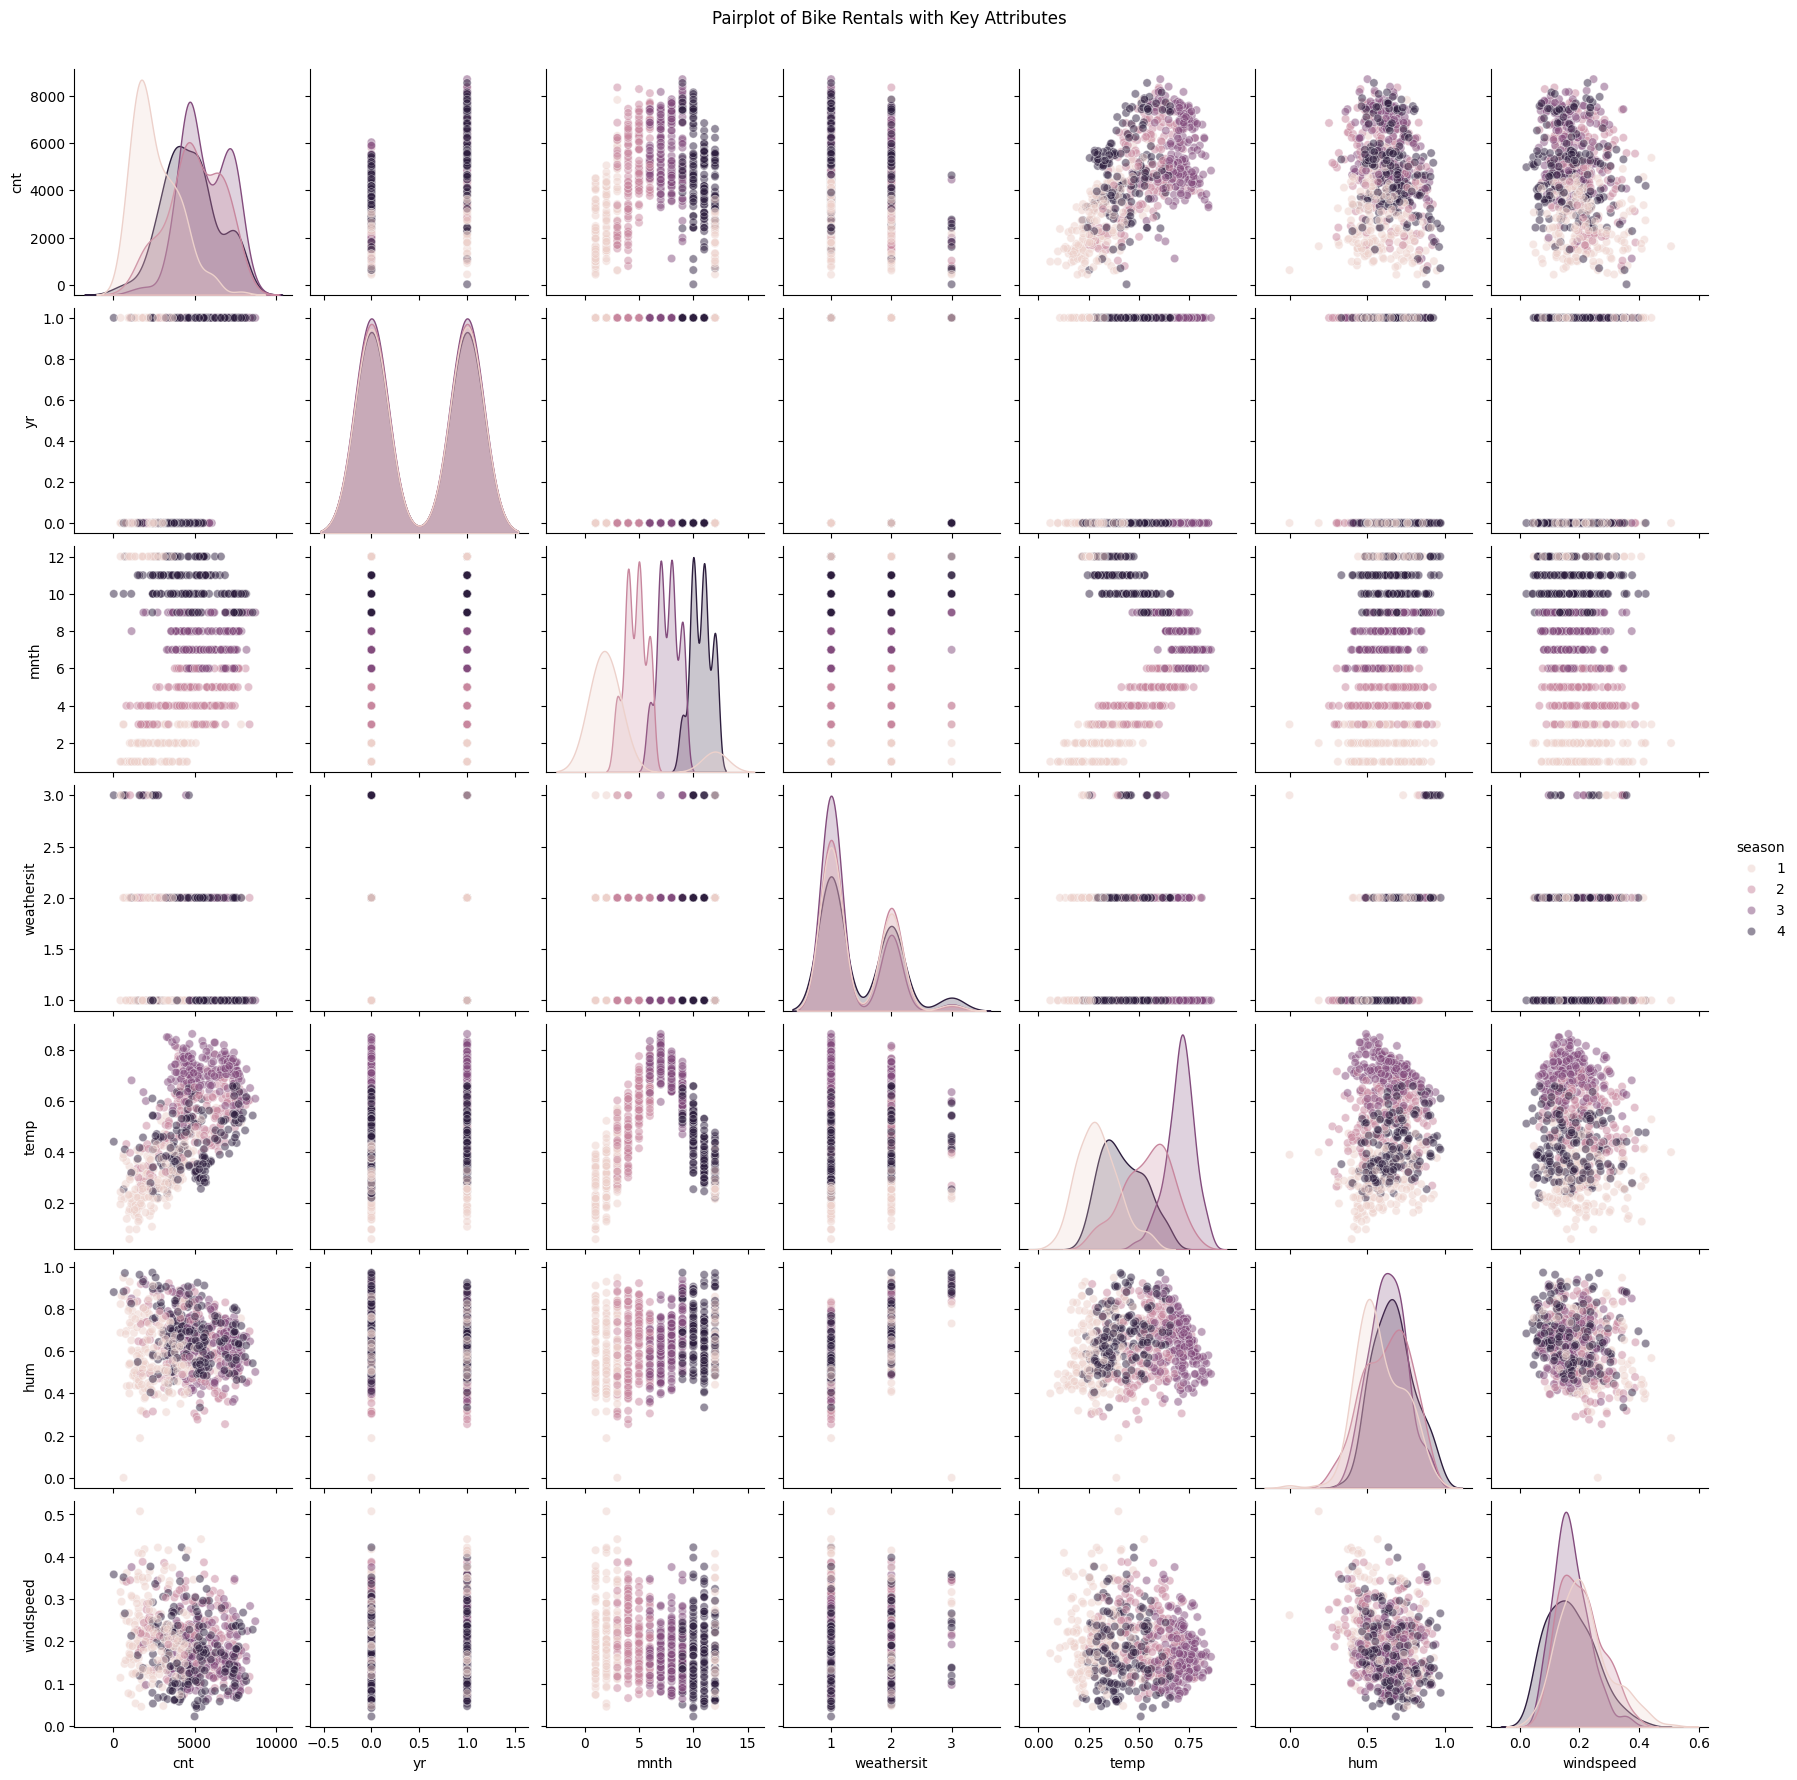

In [281]:
cols = ['cnt', 'season', 'yr', 'mnth', 'weathersit', 'temp', 'hum', 'windspeed']

sns.pairplot(
    data[cols],
    diag_kind='kde',
    plot_kws={'alpha': 0.5},
    hue='season'
)

plt.suptitle("Pairplot of Bike Rentals with Key Attributes", y=1.02)
plt.show()


### conclusions
- Strong relationships 

    - temp ↔ cnt → strong positive trend

    - season ↔ cnt → distinct separation (Fall & Summer higher)

    - mnth ↔ cnt → seasonal curve visible

    - yr ↔ cnt → upward shift (growth trend)

- Weak / noisy relationships

    - hum ↔ cnt → weak negative trend

    - windspeed ↔ cnt → very weak, scattered

    - weathersit ↔ cnt → overlapping categories

- Redundancy visible

    - season ↔ mnth ↔ weathersit show overlap

- Explains why:

    - weathersit becomes less useful once season + temp are included

#### The pairplot reveals strong associations between bike rentals and temperature, season, and month, while humidity and windspeed exhibit weak relationships. Weather situation shows overlapping distributions and provides limited additional information once seasonal effects are considered.

# Droping the Irrelavant Attributes

In [282]:
data = data.drop(columns=["instant"])
data = data.drop(columns=["registered", "casual"])
if "dteday" in data.columns:
    data = data.drop(columns=["dteday"])

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [283]:
#data.to_csv("df.csv", index=False)

In [284]:
df.head()

,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,1,1,0.226957,0.229270,0.436957,0.186900,1600


# Divide X and y variables 

In [285]:
X = df.drop(columns=["cnt"])
y = df["cnt"]

In [286]:
X.head()

,season,yr,mnth,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,1,1,0.226957,0.229270,0.436957,0.186900


In [287]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

# Split train_test_split

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)

# Preprocessing the data

In [289]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model building 

In [290]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

In [291]:
def evaluate_model(name, y_true, y_pred, X_test):
    r2 = r2_score(y_true, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return {
        "Model": name,
        "R2": r2,
        "Adjusted_R2": adj_r2,
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "Accuracy_like_%": r2 * 100
    }

# LinearRegression Model 

In [292]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

lr_results = evaluate_model("Linear Regression", y_test, y_pred_lr, X_test)


# RandomForest Regressor Model

In [293]:
rf = RandomForestRegressor(n_estimators=100, random_state=13)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_results = evaluate_model("Random Forest", y_test, y_pred_rf, X_test)


# GradientBoosting Regressor Model

In [294]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=13)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

gbr_results = evaluate_model("Gradient Boosting", y_test, y_pred_gbr, X_test)


# KNeighbors Regressor Model

In [295]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

knn_results = evaluate_model("KNN", y_test, y_pred_knn, X_test)


# SVR Model

In [296]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

svr_results = evaluate_model("SVR", y_test, y_pred_svr, X_test)


# LGBM Regressor Model

In [297]:
lgbm = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=13
)

lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

lgbm_results = evaluate_model(
    "LightGBM",
    y_test,
    y_pred_lgbm,
    X_test
)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 9
[LightGBM] [Info] Start training from score 4520.208029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# Models Results 

In [298]:
results_df = pd.DataFrame([
    lr_results,
    rf_results,
    gbr_results,
    knn_results,
    svr_results,
    lgbm_results
])

results_df.set_index("Model", inplace=True)
results_df


,R2,Adjusted_R2,MAE,MSE,RMSE,Accuracy_like_%
Model,,,,,,
Linear Regression,0.823693,0.814521,604.653062,6.554431e+05,809.594421,82.369313
Random Forest,0.880059,0.873820,489.581148,4.458943e+05,667.753196,88.005941
Gradient Boosting,0.881632,0.875474,490.879197,4.400475e+05,663.360743,88.163215
KNN,0.857454,0.850038,527.673224,5.299344e+05,727.965916,85.745358
SVR,0.024707,-0.026031,1560.636052,3.625777e+06,1904.147271,2.470658
LightGBM,0.882054,0.875918,496.937509,4.384798e+05,662.178035,88.205385


# Feature Importance - LightGBM

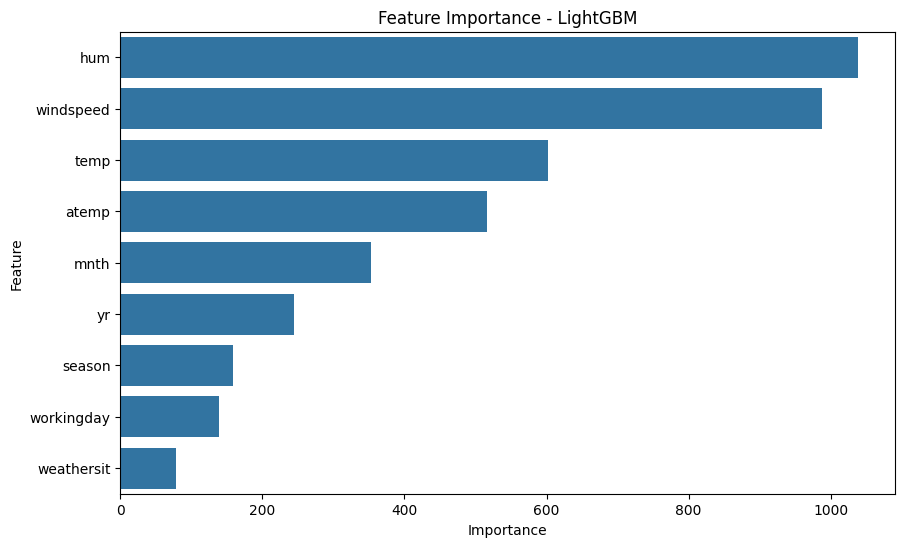

In [299]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lgbm.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importance,
    x="Importance",
    y="Feature"
)

plt.title("Feature Importance - LightGBM")
plt.show()


# Actual vs Predicted - LightGBM

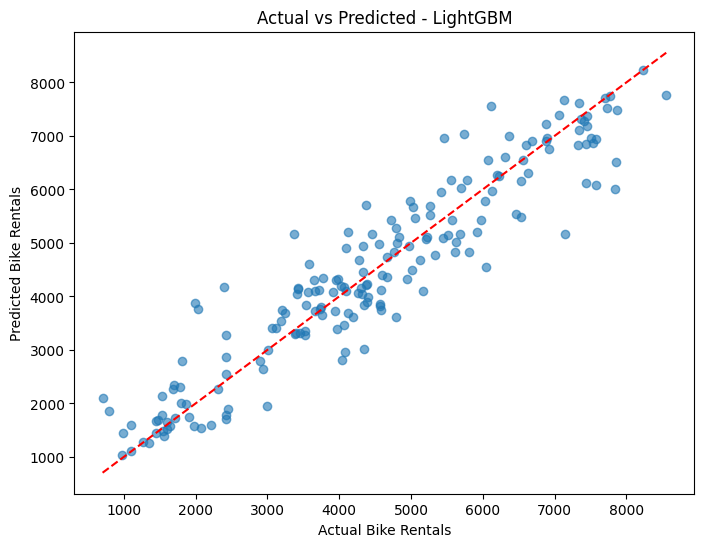

In [300]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lgbm, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')

plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs Predicted - LightGBM")
plt.show()


#### LightGBM performs best with high R² and low error values.Temperature-related features are the strongest predictors of bike demand.

## Correlation Heatmap of Bike Rental Attributes

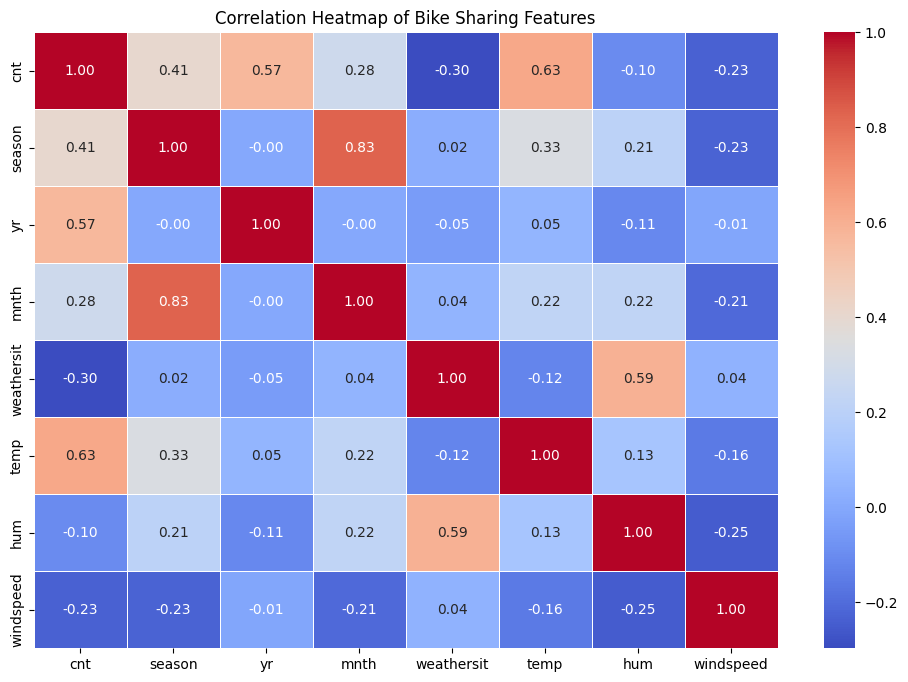

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr = data[cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Bike Sharing Features")
plt.show()


- temp → cnt : 0.63 (Strong Positive)
    - As temperature increases, bike rentals increase significantly

- yr → cnt : 0.57 (Strong Positive)
    - Demand increased year-over-year 

- season → cnt : 0.41 (Moderate Positive)
    - Seasonal effects matter (summer & fall higher usage)

- mnth → cnt : 0.28
    - Monthly patterns exist but are weaker than season

- weathersit → cnt : -0.30 (Moderate Negative)
    - Worse weather → fewer rentals

- hum → cnt : -0.10
    - Slight discomfort effect, weak overall

- windspeed → cnt : -0.23
    - Mild negative impact, not stron

# mlflow 

In [302]:
import mlflow
import mlflow.sklearn
import os
import time

# Train + Log + Register

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

# ===============================
# Model dictionary
# ===============================
models = {
    "LinearRegression": LinearRegression(),
    
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ),
    
    "GradientBoostingRegressor": GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ),
    
    "KNeighborsRegressor": KNeighborsRegressor(
        n_neighbors=5
    ),
    
    "SVR": SVR(
        kernel="rbf",
        C=100,
        gamma="scale"
    ),
    
    "LGBMRegressor": LGBMRegressor(
        n_estimators=100,
        learning_rate=0.05,
        random_state=42
    )
}

# ===============================
# Train + Log + Register
# ===============================
for model_name, model in models.items():

    with mlflow.start_run(run_name=model_name):

        # Train
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        accuracy_like = r2 * 100

        # Adjusted R2
        n = X_test.shape[0]
        p = X_test.shape[1]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

        # -------------------------
        # Log parameters
        # -------------------------
        mlflow.log_param("model_name", model_name)

        # -------------------------
        # Log metrics (SAFE NAMES)
        # -------------------------
        mlflow.log_metric("r2_score", r2)
        mlflow.log_metric("adjusted_r2", adj_r2)
        mlflow.log_metric("mae", mae)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("accuracy_like_percent", accuracy_like)

        # -------------------------
        # Log & Register model
        # -------------------------
        artifact_path = model_name.lower()

        mlflow.sklearn.log_model(
            model,
            artifact_path=artifact_path
        )

        model_uri = f"runs:/{mlflow.active_run().info.run_id}/{artifact_path}"
        mlflow.register_model(model_uri, model_name)

        # Console output
        print(f"\n✅ {model_name}")
        print(f"R2 Score            : {r2:.4f}")
        print(f"Adjusted R2         : {adj_r2:.4f}")
        print(f"MAE                 : {mae:.4f}")
        print(f"MSE                 : {mse:.4f}")
        print(f"RMSE                : {rmse:.4f}")
        print(f"Accuracy_like_%     : {accuracy_like:.2f}")


2026/01/31 20:44:13 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'LinearRegression' already exists. Creating a new version of this model...
2026/01/31 20:44:23 WARNING mlflow.tracking._model_registry.fluent: Run with id 6b096f996bb3493aa8c1aff16a3054b5 has no artifacts at artifact path 'linearregression', registering model based on models:/m-0be405b1fdc34b00aacc427e7450fca2 instead
Created version '2' of model 'LinearRegression'.



✅ LinearRegression
R2 Score            : 0.8237
Adjusted R2         : 0.8145
MAE                 : 604.6531
MSE                 : 655443.1268
RMSE                : 809.5944
Accuracy_like_%     : 82.37


2026/01/31 20:44:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'RandomForestRegressor' already exists. Creating a new version of this model...
2026/01/31 20:44:34 WARNING mlflow.tracking._model_registry.fluent: Run with id 1375b184a46f47c19c7c618108b26acd has no artifacts at artifact path 'randomforestregressor', registering model based on models:/m-546d5d8ae7034478ac9c01ed10d85fbc instead
Created version '2' of model 'RandomForestRegressor'.



✅ RandomForestRegressor
R2 Score            : 0.8719
Adjusted R2         : 0.8652
MAE                 : 501.3057
MSE                 : 476299.9637
RMSE                : 690.1449
Accuracy_like_%     : 87.19


2026/01/31 20:44:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'GradientBoostingRegressor' already exists. Creating a new version of this model...
2026/01/31 20:44:44 WARNING mlflow.tracking._model_registry.fluent: Run with id 44fbd3bf72c540b3ad70582cefa46c34 has no artifacts at artifact path 'gradientboostingregressor', registering model based on models:/m-b66f3d9be8264f3a9422e40f86f50d07 instead
Created version '2' of model 'GradientBoostingRegressor'.
2026/01/31 20:44:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.



✅ GradientBoostingRegressor
R2 Score            : 0.8825
Adjusted R2         : 0.8764
MAE                 : 489.4575
MSE                 : 436860.0033
RMSE                : 660.9539
Accuracy_like_%     : 88.25


Registered model 'KNeighborsRegressor' already exists. Creating a new version of this model...
2026/01/31 20:44:55 WARNING mlflow.tracking._model_registry.fluent: Run with id 9696820aac3a401f90fbf7bf66f57741 has no artifacts at artifact path 'kneighborsregressor', registering model based on models:/m-dac16e1d010748739f91a2f16f48598d instead
Created version '2' of model 'KNeighborsRegressor'.



✅ KNeighborsRegressor
R2 Score            : 0.8419
Adjusted R2         : 0.8337
MAE                 : 560.2601
MSE                 : 587579.8557
RMSE                : 766.5376
Accuracy_like_%     : 84.19


2026/01/31 20:44:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'SVR' already exists. Creating a new version of this model...
2026/01/31 20:45:07 WARNING mlflow.tracking._model_registry.fluent: Run with id 455be6e3ae3a4bfa82cb55f01e8bd0cd has no artifacts at artifact path 'svr', registering model based on models:/m-b1777514c3f84d68af9eadfc66bef034 instead
Created version '2' of model 'SVR'.



✅ SVR
R2 Score            : 0.5083
Adjusted R2         : 0.4827
MAE                 : 1114.9829
MSE                 : 1828076.7344
RMSE                : 1352.0639
Accuracy_like_%     : 50.83
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 758
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 9
[LightGBM] [Info] Start training from score 4520.208029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

2026/01/31 20:45:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
Registered model 'LGBMRegressor' already exists. Creating a new version of this model...
2026/01/31 20:45:16 WARNING mlflow.tracking._model_registry.fluent: Run with id 954fa5e1f97146bd81dac718ede98370 has no artifacts at artifact path 'lgbmregressor', registering model based on models:/m-b5ae62148815408094e2c5c94bdc09a1 instead



✅ LGBMRegressor
R2 Score            : 0.8833
Adjusted R2         : 0.8772
MAE                 : 499.0348
MSE                 : 433838.6640
RMSE                : 658.6643
Accuracy_like_%     : 88.33


Created version '2' of model 'LGBMRegressor'.


# Load & Registered Models

In [304]:
import mlflow
import mlflow.sklearn

# ===============================
# Load Latest Registered Models
# ===============================

loaded_models = {}

model_names = [
    "LinearRegression",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "KNeighborsRegressor",
    "SVR",
    "LGBMRegressor"
]

for model_name in model_names:
    loaded_models[model_name] = mlflow.sklearn.load_model(
        model_uri=f"models:/{model_name}/latest"
    )
    print(f"✅ Loaded {model_name} (latest)")


✅ Loaded LinearRegression (latest)
✅ Loaded RandomForestRegressor (latest)
✅ Loaded GradientBoostingRegressor (latest)
✅ Loaded KNeighborsRegressor (latest)
✅ Loaded SVR (latest)
✅ Loaded LGBMRegressor (latest)


# LGBM predictions

In [305]:
# Example: LGBM predictions
y_pred_lgbm = loaded_models["LGBMRegressor"].predict(X_test)

from sklearn.metrics import r2_score

print("LGBM R2 Score:", r2_score(y_test, y_pred_lgbm))


LGBM R2 Score: 0.8833022506208641


In [308]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=13
)

lgbm_model.fit(X_train_scaled, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 548, number of used features: 9
[LightGBM] [Info] Start training from score 4520.208029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [309]:
import pickle

# Assume this is your trained LightGBM model
# lgbm_model = LGBMRegressor(...)
# lgbm_model.fit(X_train_scaled, y_train)

with open("lgbm_model.pkl", "wb") as file:
    pickle.dump(lgbm_model, file)

print("✅ LightGBM model saved as lgbm_model.pkl")


✅ LightGBM model saved as lgbm_model.pkl


# Expected Outcome

   - Identify the best-performing regression model for bike demand prediction

   - Gain insights into feature importance affecting bike rentals

   - Enable reproducible ML experiments using MLflow

   - Provide a deployable Streamlit interface for real-time predictions